## Load Dataset - Argus

In [1]:
import gc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import ipaddress
import random
import numpy as np

random.seed(123)
np.random.seed(123)

dataset_train = pd.read_csv("/home/lucianobf/dev/datasets/dataset_network_argus/train/dataset_network_train_argus.csv", sep = ',')
dataset_test = pd.read_csv("/home/lucianobf/dev/datasets/dataset_network_argus/test/dataset_network_test_argus.csv", sep = ',')

print("Dataset Original Shape")
print(f"Shape train: {dataset_train.shape}")
print(f"Shape test: {dataset_test.shape}")

y_train = dataset_train['Label1']
y_test = dataset_test['Label1']


drop_comlumns=['StartTime', 'LastTime', 'Proto',  'Dport', 'Label1', 'Label2']
X_train = dataset_train.drop(columns=drop_comlumns)
X_test = dataset_test.drop(columns=drop_comlumns)

del dataset_train
del dataset_test
gc.collect()


# ## Load dataset preprocessed
# X_train =  pd.read_csv("/home/lucianobf/dev/datasets/dataset_network_argus/argus_X_train.csv", sep = ',')
# X_test =  pd.read_csv("/home/lucianobf/dev/datasets/dataset_network_argus/argus_X_test.csv", sep = ',')

# y_train =  pd.read_csv("/home/lucianobf/dev/datasets/dataset_network_argus/argus_y_train.csv", sep = ',')
# y_test =  pd.read_csv("/home/lucianobf/dev/datasets/dataset_network_argus/argus_y_test.csv", sep = ',')


Dataset Original Shape
Shape train: (38711727, 17)
Shape test: (21112383, 17)


0

In [2]:
print("Train/Test Shapes")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print("")
print(f" X_test shape: {X_test.shape}")
print(f" y_test shape: {y_test.shape}")

Train/Test Shapes
X_train shape: (38711727, 11)
y_train shape: (38711727,)

 X_test shape: (21112383, 11)
 y_test shape: (21112383,)


### Balanceamento

y_train
attack    32471965
normal     6239762
Name: Label1, dtype: int64
attack    0.838815
normal    0.161185
Name: Label1, dtype: float64

y_test
attack    17694975
normal     3417408
Name: Label1, dtype: int64
attack    0.838133
normal    0.161867
Name: Label1, dtype: float64


<Figure size 432x288 with 0 Axes>

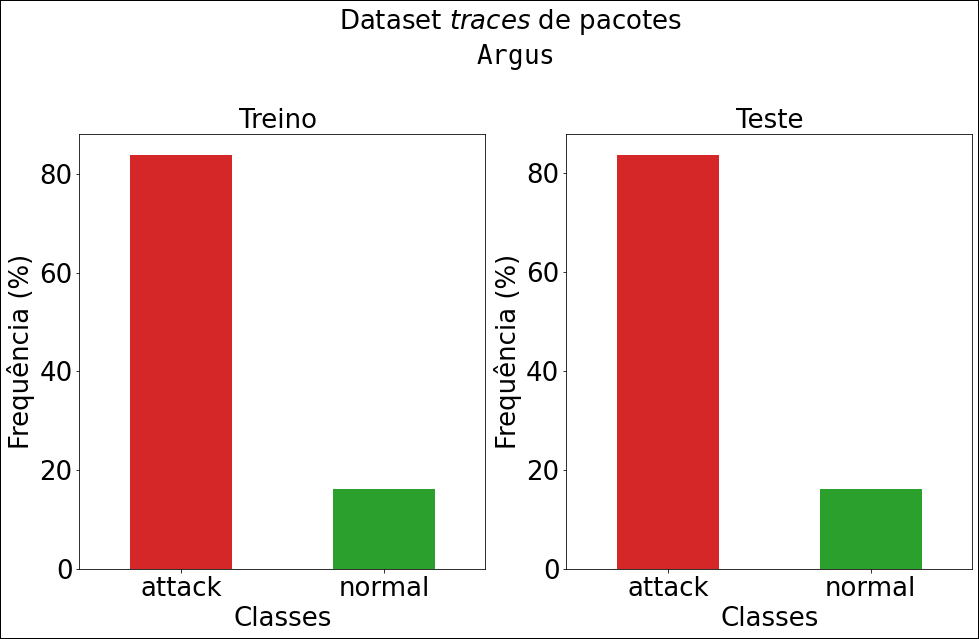

In [3]:
print("y_train")
print(y_train.value_counts())
print(y_train.value_counts(normalize=True))
print("")
print("y_test")
print(y_test.value_counts())
print(y_test.value_counts(normalize=True))

plt.clf()
plt.rcParams["axes.titlesize"] = 26
plt.rc('font', size=26)
plt.rc('figure', facecolor='white')
fig, ax = plt.subplots(1,2, figsize=(16,8), linewidth=2, edgecolor="black")
for a in ax:
    a.set_ylabel("Frequência (%)")
    a.set_xlabel("Classes")

((y_train.value_counts()/y_train.count())*100).plot.bar(rot=0, ax=ax[0], color=['tab:red','tab:green'], title="Treino ")
((y_test.value_counts()/y_test.count())*100).plot.bar(rot=0, ax=ax[1], color=['tab:red','tab:green'], title="Teste")
plt.suptitle("Dataset $\mathit{traces}$ de pacotes \n $\mathtt{Argus}$", fontsize=26, y=1.1)
plt.show()

## Preprocessing

### Map y (labels) to binary

In [4]:

# Map labels
# 0 : normal
# 1 : attack

y_train = (y_train.apply(lambda x : 0 if x=="normal" else (1 if x=="attack" else x)))
y_test = (y_test.apply(lambda x : 0 if x=="normal" else (1 if x=="attack" else x)))

print("y_train")
print(y_train.value_counts())
print("")
print("y_test")
print(y_test.value_counts())


y_train
1    32471965
0     6239762
Name: Label1, dtype: int64

y_test
1    17694975
0     3417408
Name: Label1, dtype: int64


In [5]:
X_train.dtypes

Dur         float64
SrcAddr      object
Sport         int64
DstAddr      object
State        object
SrcPkts       int64
DstPkts       int64
TotPkts       int64
SrcBytes      int64
DstBytes      int64
TotBytes      int64
dtype: object

### Convert IPs to int

In [6]:
import ipaddress

def convert_ip_to_int(ip):
    return int(ipaddress.IPv4Address(ip))

def convert_int_to_ip(i):
    return  


def ip_to_int(X):
    X['SrcAddr'] = X['SrcAddr'].apply(convert_ip_to_int)
    X['DstAddr'] = X['DstAddr'].apply(convert_ip_to_int)
    return X


X_train = ip_to_int(X_train)
X_test = ip_to_int(X_test)


In [7]:
# X_train = pd.get_dummies(X_train, dtype=int)
# X_test = pd.get_dummies(X_test,dtype=int)
# X_train


def state_hot_encoder(X):

    X['StateFIN'] = 0
    X.loc[ X['State'] == 'FIN', 'StateFIN'] = 1

    X['StateRST'] = 0
    X.loc[ X['State'] == 'RST', 'StateRST'] = 1

    X['StateACC'] = 0
    X.loc[ X['State'] == 'ACC', 'StateACC'] = 1

    X['StateREQ'] = 0
    X.loc[ X['State'] == 'REQ', 'StateREQ'] = 1

    X['StateCON'] = 0
    X.loc[ X['State'] == 'CON', 'StateCON'] = 1
   
    return X.drop(columns='State')


X_train = state_hot_encoder(X_train)
X_test = state_hot_encoder(X_test)

feature_names = X_train.columns.values.tolist()
feature_names

['Dur',
 'SrcAddr',
 'Sport',
 'DstAddr',
 'SrcPkts',
 'DstPkts',
 'TotPkts',
 'SrcBytes',
 'DstBytes',
 'TotBytes',
 'StateFIN',
 'StateRST',
 'StateACC',
 'StateREQ',
 'StateCON']

In [8]:
X_train.dtypes

Dur         float64
SrcAddr       int64
Sport         int64
DstAddr       int64
SrcPkts       int64
DstPkts       int64
TotPkts       int64
SrcBytes      int64
DstBytes      int64
TotBytes      int64
StateFIN      int64
StateRST      int64
StateACC      int64
StateREQ      int64
StateCON      int64
dtype: object

In [9]:
### Save dataset preprocessed To CSV

# X_train.to_csv('/home/lucianobf/dev/datasets/dataset_network_argus/argus_X_train.csv', index=False)
# X_test.to_csv('/home/lucianobf/dev/datasets/dataset_network_argus/argus_X_test.csv', index=False)

# y_train.to_csv('/home/lucianobf/dev/datasets/dataset_network_argus/argus_y_train.csv', index=False)
# y_test.to_csv('/home/lucianobf/dev/datasets/dataset_network_argus/argus_y_test.csv', index=False)


## StandardScaler

In [10]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler() 
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)

# type(X_train)

In [11]:
X_train

,Dur,SrcAddr,Sport,DstAddr,SrcPkts,DstPkts,TotPkts,SrcBytes,DstBytes,TotBytes,StateFIN,StateRST,StateACC,StateREQ,StateCON
0,0.018118,2886955314,37942,171049377,7,6,13,642,4626,5268,1,0,0,0,0
1,0.006699,2886955314,37940,171049377,6,7,13,576,4692,5268,1,0,0,0,0
2,0.005652,2886955314,37938,171049377,6,7,13,574,4327,4901,1,0,0,0,0
3,0.006478,2886955314,37934,171049377,6,8,14,574,6155,6729,1,0,0,0,0
4,0.021746,2886955314,37998,171049377,6,7,13,576,4692,5268,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38711722,0.054901,2886955314,56024,171049377,12,19,31,981,25440,26421,0,1,0,0,0
38711723,0.002296,2886955314,56026,171049377,5,7,12,515,3696,4211,1,0,0,0,0
38711724,0.003716,2886955315,56188,171049377,7,12,19,665,12042,12707,1,0,0,0,0
38711725,0.052216,2886955314,56030,171049377,6,6,12,581,3587,4168,0,1,0,0,0


### Matriz confusão

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Plot Confusion Matrix
def plot_confusion_matrix(ytest, ypred, title):
    plt.cla()
    plt.clf()
    plt.rcParams["axes.titlesize"] = 15
    plt.rc('font', size=14)
    plt.rc('figure', facecolor='white')
    disp = ConfusionMatrixDisplay.from_predictions(ytest, ypred, cmap=plt.cm.Blues, normalize='true', values_format='.2f', display_labels=['Normal','Ataque'])
    disp.ax_.set_title("normalização : linhas (real)", size=14)
    disp.figure_.suptitle(title, y=1.1, size=15)
    # disp.ax_.set_title(title+"\n normalização: true")
    # xlabels = [item.get_text() for item in disp.ax_.get_
    # ylabels = [item.get_text() for item in disp.ax_.get_yticklabels()]
    # xlabels[0] = 'normal'
    # xlabels[1] = 'ataque'
    # ylabels[0] = 'normal'
    # ylabels[1] = 'ataque'
    # disp.ax_.set_xticklabels(xlabels)
    # disp.ax_.set_yticklabels(ylabels)
    disp.ax_.set_xlabel("Predito", size=15)
    disp.ax_.set_ylabel("Real", size=15)
    disp.figure_.set_linewidth(2)
    disp.figure_.set_edgecolor("black")
    plt.show()

## Classificadores

- RandomForestClassifier

RandomForest
   Accuracy: 1.0
  Precision: 1.0
     Recall: 1.0
         F1: 1.0


<Figure size 432x288 with 0 Axes>

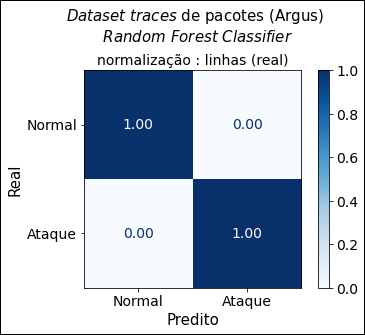

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import random
import numpy as np

random.seed(123)
np.random.seed(123)

## Classifier
modeloRF = RandomForestClassifier(n_jobs=10)
modeloRF.fit(X_train, y_train)
ypred = modeloRF.predict(X_test)
print(f"RandomForest")
print(f"   Accuracy: {round(accuracy_score(ypred, y_test),2)}")
print(f"  Precision: {round(precision_score(ypred, y_test),2)}")
print(f"     Recall: {round(recall_score(ypred, y_test),2)}")
print(f"         F1: {round(f1_score(ypred, y_test),2)}")

plot_confusion_matrix(ytest=y_test, ypred=ypred,title="$\mathit{Dataset \ traces}$ de pacotes (Argus) \n $\mathit{Random \ Forest \ Classifier}$")


In [14]:
#Plot Feature Importances
def plot_feature_importances(feature_names, importances, err, dataset):
    forest_importances = pd.Series(importances, index=feature_names)
    plt.cla()
    plt.clf()
    # plt.rcParams["mathtext.fontset"] = 'dejavuserif'
    # plt.rcParams["axes.titlesize"] = 18
    # plt.rcParams["axes.labelsize"] = 16
    # plt.rc('font', size=16)
    # plt.rc('figure', facecolor='white')

    fig, ax = plt.subplots(figsize=(10,6), linewidth=2, edgecolor="black")
    forest_importances.plot.bar(yerr=std, ax=ax)
    ax.set_title("Importância das Características - "+dataset+" \n Random Forest (MDI)")
    ax.set_ylabel("Diminuição média na impureza")
    plt.xticks(rotation=30, ha='right', rotation_mode='anchor')
    fig.tight_layout()
    plt.show()



importances = modeloRF.feature_importances_
std = np.std([tree.feature_importances_ for tree in modeloRF.estimators_], axis=0)
# plot_feature_importances(feature_names=feature_names, importances=importances, err=std, dataset="Argus")

- Naive Bayes - Gaussian

GaussianNB
   Accuracy: 1.0
  Precision: 1.0
     Recall: 1.0
         F1: 1.0


<Figure size 432x288 with 0 Axes>

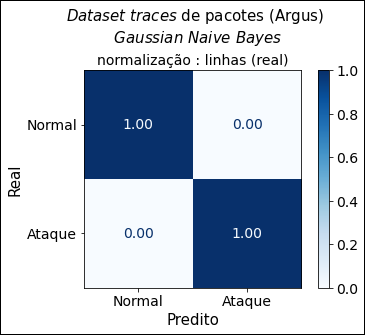

In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import random
import numpy as np

random.seed(123)
np.random.seed(123)

modeloGNB = GaussianNB()

modeloGNB.fit(X_train, y_train)
ypred = modeloGNB.predict(X_test)
print(f"GaussianNB")
print(f"   Accuracy: {round(accuracy_score(ypred, y_test),2)}")
print(f"  Precision: {round(precision_score(ypred, y_test),2)}")
print(f"     Recall: {round(recall_score(ypred, y_test),2)}")
print(f"         F1: {round(f1_score(ypred, y_test),2)}")

plot_confusion_matrix(ytest=y_test, ypred=ypred,title="$\mathit{Dataset \ traces}$ de pacotes (Argus) \n $\mathit{Gaussian \ Naive \ Bayes}$")